In [6]:
# importing the bunch of libraries
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten,Dropout
from keras.layers import MaxPool2D

In [7]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',input_shape=(48,48,1)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform'))
model.add(MaxPool2D(pool_size=(2,2),padding="same"))
model.add(Dropout(0.25))
model.add(Conv2D(128,(5,5),activation='relu',kernel_initializer='he_uniform'))
model.add(Conv2D(254,(5,5),activation='relu',kernel_initializer='he_uniform'))
model.add(MaxPool2D(pool_size=(2,2),padding="same"))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(7,activation="softmax"))

In [8]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [9]:
## summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 44, 44, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 18, 18, 128)       204928    
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 254)       813054    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 254)        

In [10]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1.0/255,
                                   rotation_range=20,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1.0/255)

training_set = train_datagen.flow_from_directory('../FER-2013/data/train',
                                                 target_size = (48,48),
                                                 color_mode='grayscale',
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 shuffle=True)

test_set = test_datagen.flow_from_directory('../FER-2013/data/test',
                                            target_size = (48,48),
                                            color_mode='grayscale',
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            shuffle=True)

hist=model.fit_generator(training_set,steps_per_epoch = 500,epochs = 30,validation_data = test_set)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Epoch 1/30
500/500 [==============================] - 12s 24ms/step - loss: 1.9308 - accuracy: 0.2528 - val_loss: 1.7260 - val_accuracy: 0.3052
Epoch 2/30
500/500 [==============================] - 11s 23ms/step - loss: 1.7013 - accuracy: 0.3133 - val_loss: 1.5719 - val_accuracy: 0.3819
Epoch 3/30
500/500 [==============================] - 13s 25ms/step - loss: 1.5934 - accuracy: 0.3756 - val_loss: 1.4722 - val_accuracy: 0.4331
Epoch 4/30
500/500 [==============================] - 16s 31ms/step - loss: 1.5134 - accuracy: 0.4118 - val_loss: 1.3534 - val_accuracy: 0.4762
Epoch 5/30
500/500 [==============================] - 14s 28ms/step - loss: 1.4478 - accuracy: 0.4406 - val_loss: 1.3227 - val_accuracy: 0.4889
Epoch 6/30
500/500 [==============================] - 14s 28ms/step - loss: 1.4075 - accuracy: 0.4623 - val_loss: 1.2540 - val_accuracy: 0.5201
Epoch 7/30
500/500 [==============================]

In [11]:
## for plotting
import matplotlib.pyplot as plt

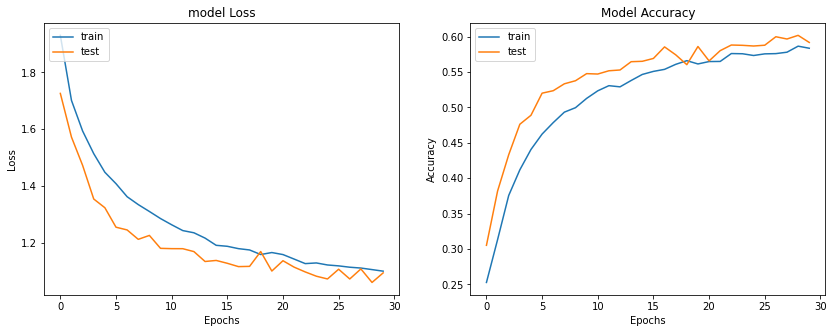

In [12]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,2)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,1)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()